In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/MNIST/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/MNIST/mnist.mm']
(4,) [60000    28    28     1]
60000


dict_keys(['mnist.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

60000


Encoder True
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) (?, 28, 28, 1)
isize:  7 28
dh0 (?, 28, 28, 1)
60000 468 128
Epoch:  0 Iteration:  0 Loss:  933.15674 78.43633 0.30768672


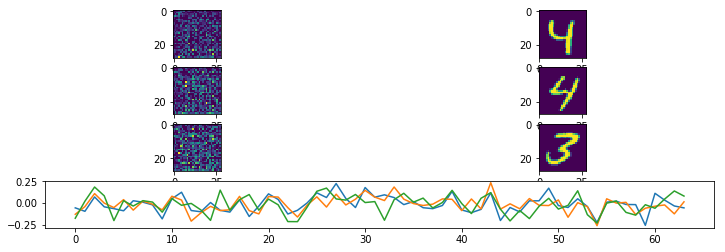

Epoch:  0 Iteration:  200 Loss:  274.8674 43.60047 1.6774617


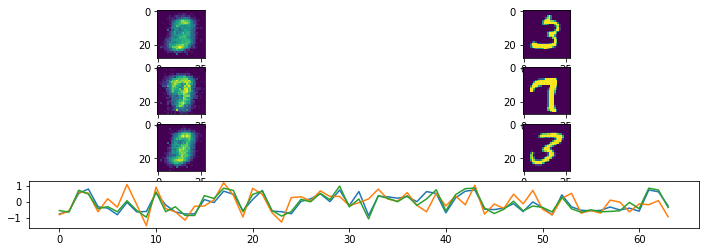

Epoch:  0 Iteration:  400 Loss:  201.28943 28.457027 1.9525509


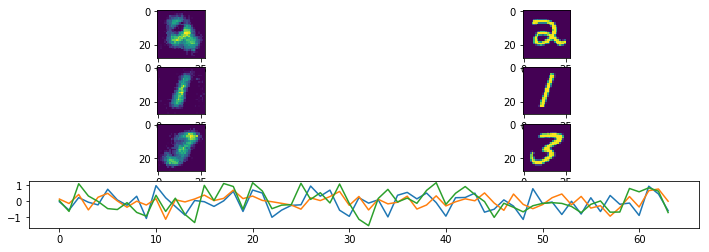

Epoch:  1 Iteration:  0 Loss:  190.05586 25.350824 2.0236366


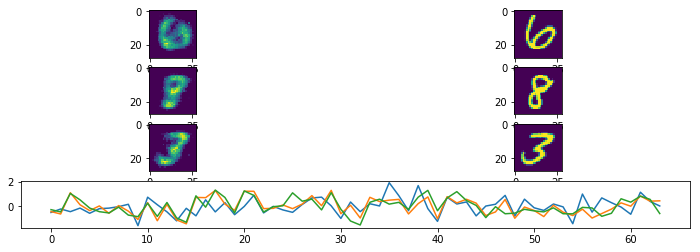

Epoch:  1 Iteration:  200 Loss:  169.42552 20.87857 2.0654118


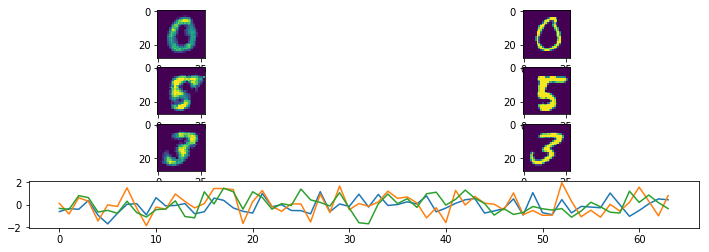

Epoch:  1 Iteration:  400 Loss:  148.92267 16.7805 2.0269747


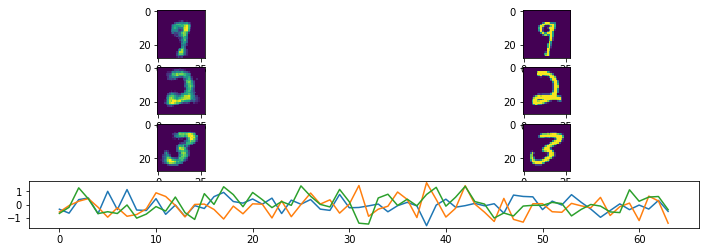

Epoch:  2 Iteration:  0 Loss:  152.25182 17.53513 1.9771578


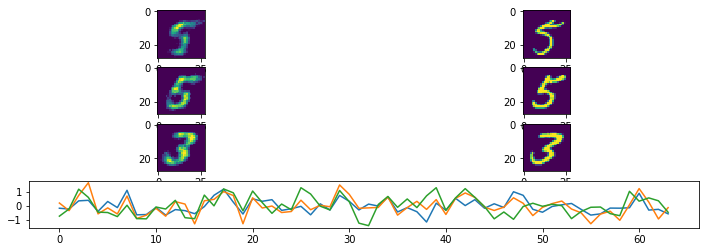

Epoch:  2 Iteration:  200 Loss:  150.97775 17.237556 1.8215337


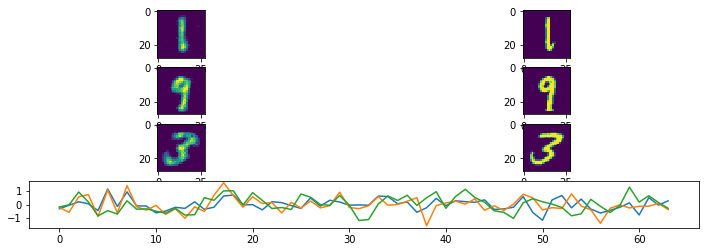

Epoch:  2 Iteration:  400 Loss:  134.21661 13.955204 1.9059345


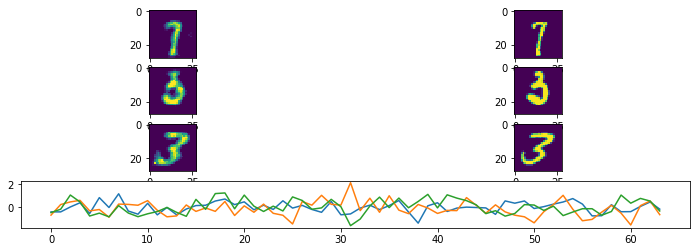

Epoch:  3 Iteration:  0 Loss:  139.87447 14.949474 1.8368013


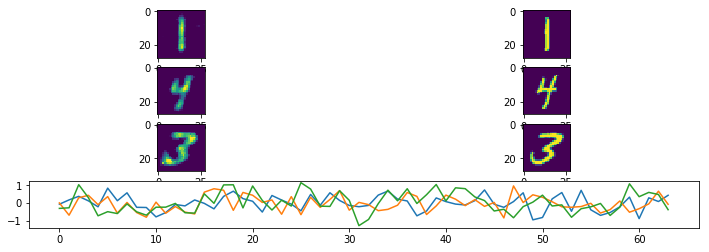

Epoch:  3 Iteration:  200 Loss:  131.96648 13.426859 1.837776


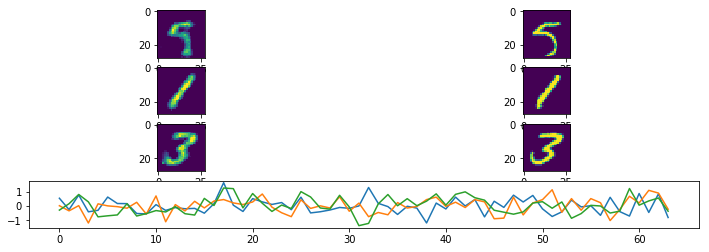

Epoch:  3 Iteration:  400 Loss:  130.9752 13.018444 1.8065698


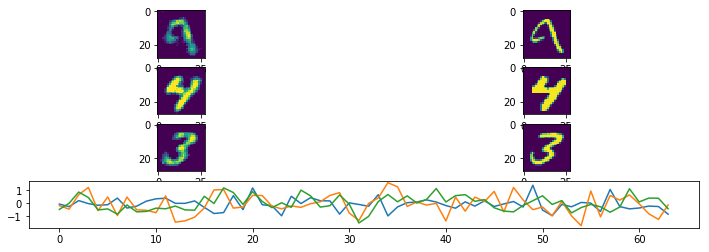

Epoch:  4 Iteration:  0 Loss:  130.29306 13.054215 1.7654651


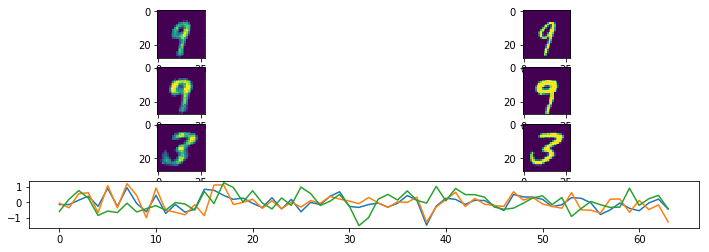

Epoch:  4 Iteration:  200 Loss:  124.57052 11.794288 1.8149769


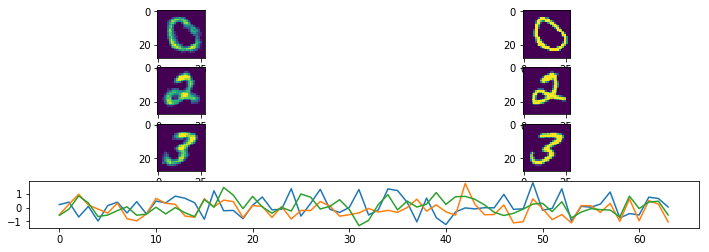

Epoch:  4 Iteration:  400 Loss:  116.11215 10.034304 1.861921


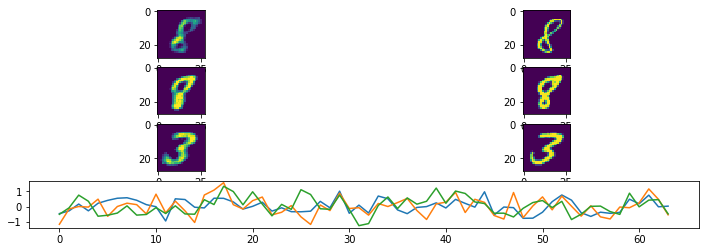

Epoch:  5 Iteration:  0 Loss:  120.49982 10.949873 1.7834929


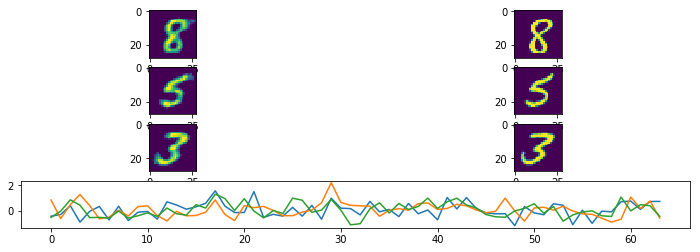

Epoch:  5 Iteration:  200 Loss:  115.03209 9.879779 1.7880484


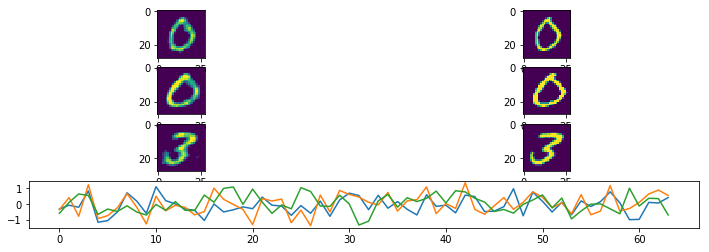

Epoch:  5 Iteration:  400 Loss:  117.96685 10.426429 1.7225745


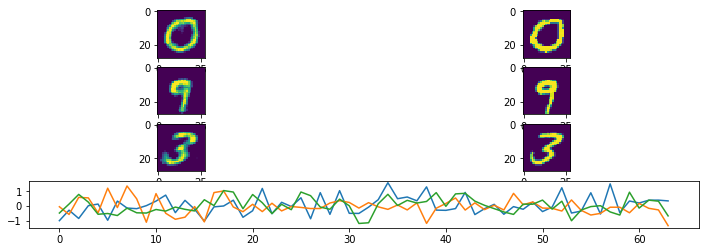

Epoch:  6 Iteration:  0 Loss:  116.399994 10.088525 1.7003765


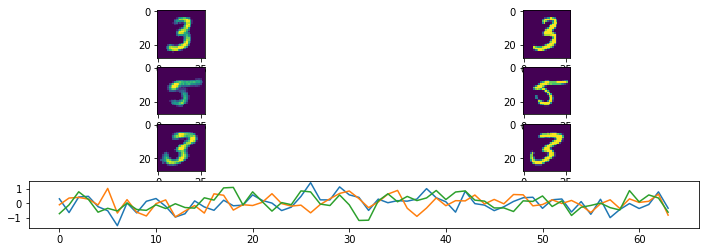

Epoch:  6 Iteration:  200 Loss:  111.39478 9.137014 1.7248353


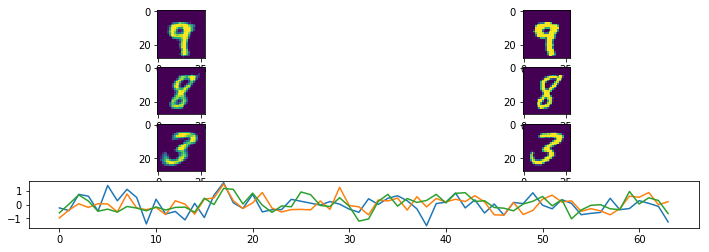

Epoch:  6 Iteration:  400 Loss:  107.68689 8.4431305 1.703499


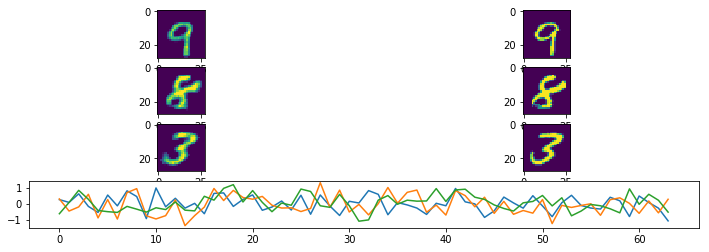

Epoch:  7 Iteration:  0 Loss:  117.5621 10.170151 1.6197344


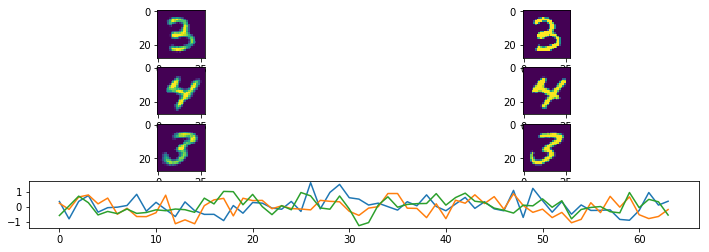

Epoch:  7 Iteration:  200 Loss:  107.63698 8.452728 1.6672852


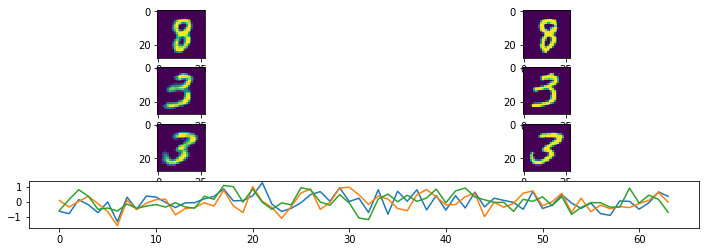

Epoch:  7 Iteration:  400 Loss:  106.09751 8.098814 1.6144795


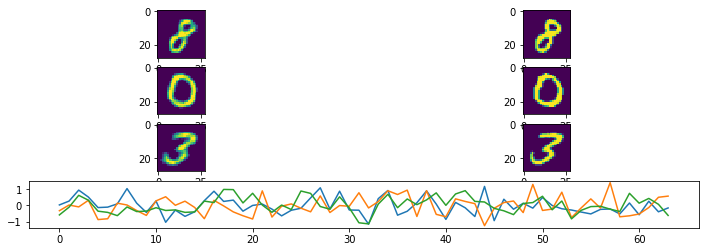

Epoch:  8 Iteration:  0 Loss:  108.64472 8.427513 1.6037531


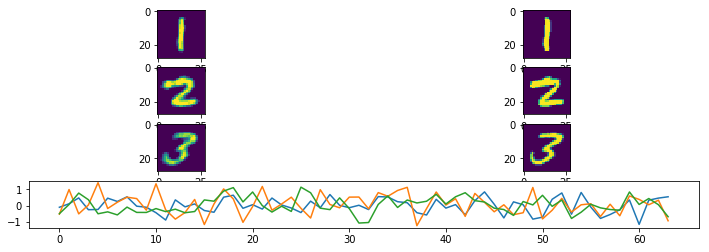

Epoch:  8 Iteration:  200 Loss:  105.746086 8.042721 1.5971739


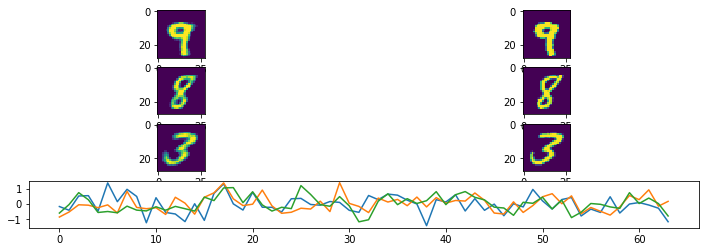

Epoch:  8 Iteration:  400 Loss:  102.57765 7.3544903 1.5996859


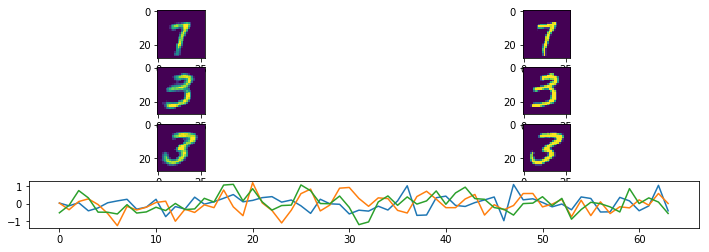

Epoch:  9 Iteration:  0 Loss:  106.73025 8.280827 1.5304912


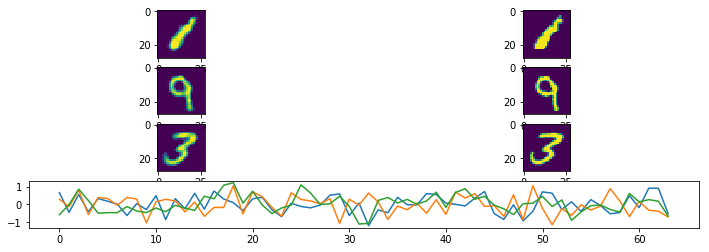

Epoch:  9 Iteration:  200 Loss:  104.467606 7.8491225 1.5321563


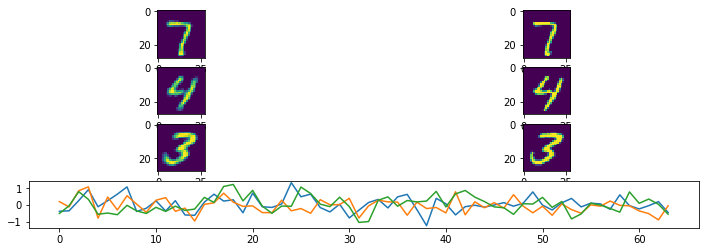

Epoch:  9 Iteration:  400 Loss:  99.83124 6.9534664 1.5197443


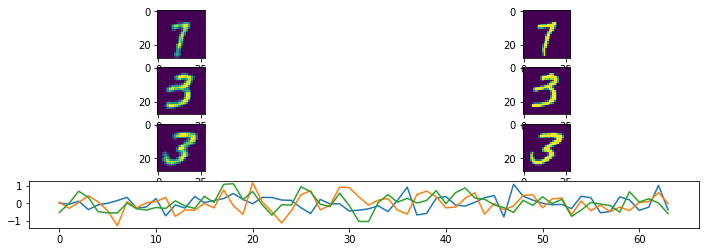

Epoch:  10 Iteration:  0 Loss:  103.167366 7.4940934 1.5078046


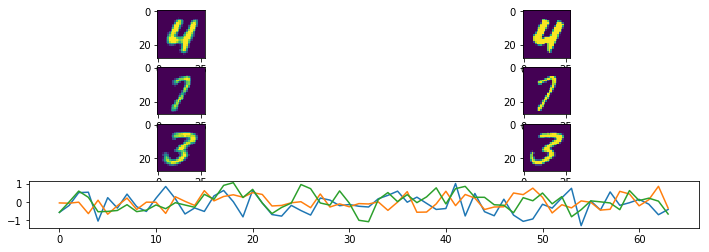

Epoch:  10 Iteration:  200 Loss:  103.50385 7.4228263 1.5110472


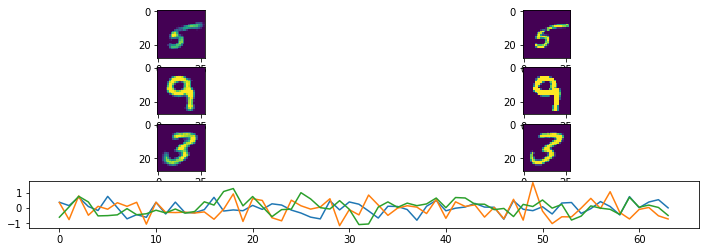

Epoch:  10 Iteration:  400 Loss:  100.359406 6.9522223 1.4913374


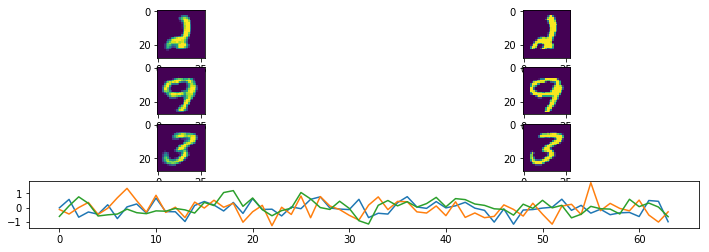

Epoch:  11 Iteration:  0 Loss:  105.924324 7.989503 1.4337952


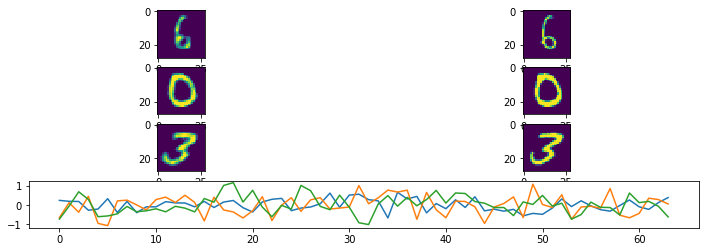

Epoch:  11 Iteration:  200 Loss:  98.36086 6.6428328 1.4656897


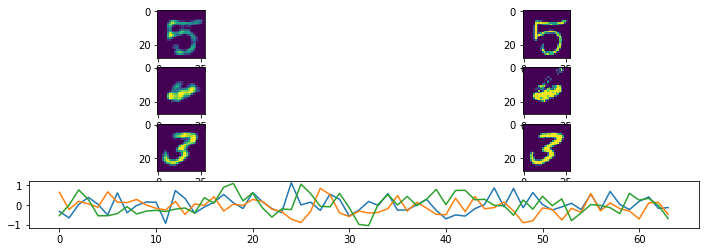

Epoch:  11 Iteration:  400 Loss:  96.6445 6.209468 1.4527154


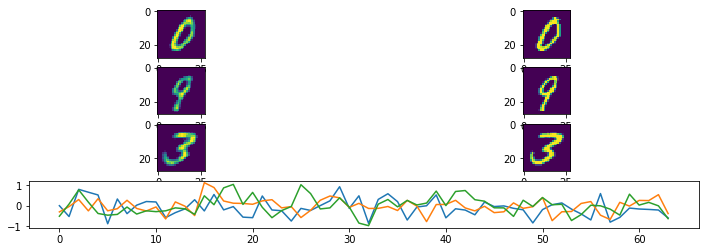

Epoch:  12 Iteration:  0 Loss:  102.23615 7.2727866 1.3980815


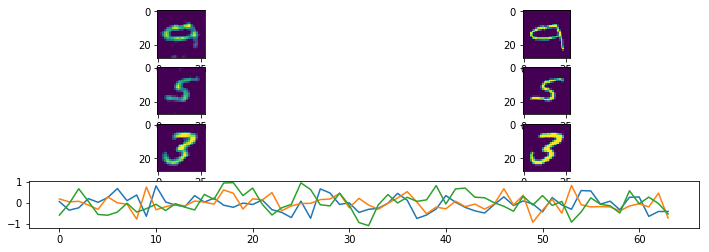

Epoch:  12 Iteration:  200 Loss:  100.756714 6.9571567 1.38707


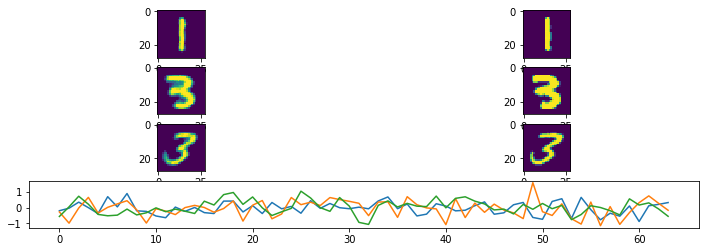

Epoch:  12 Iteration:  400 Loss:  95.502785 6.1123905 1.4019034


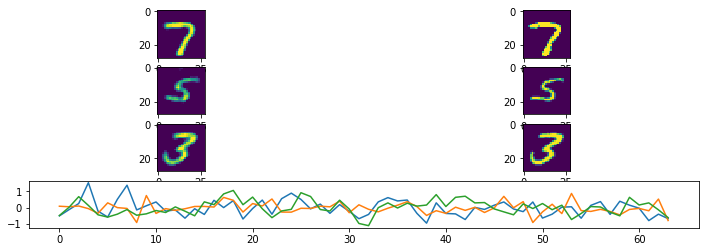

Epoch:  13 Iteration:  0 Loss:  98.89956 6.6011915 1.3823519


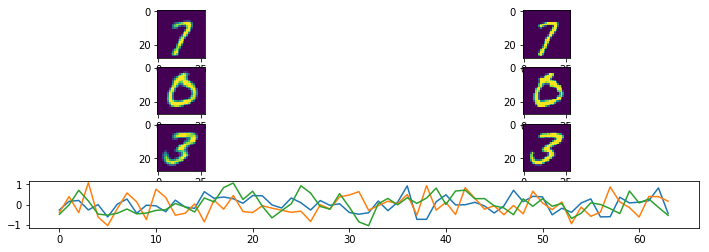

Epoch:  13 Iteration:  200 Loss:  98.15869 6.705574 1.350215


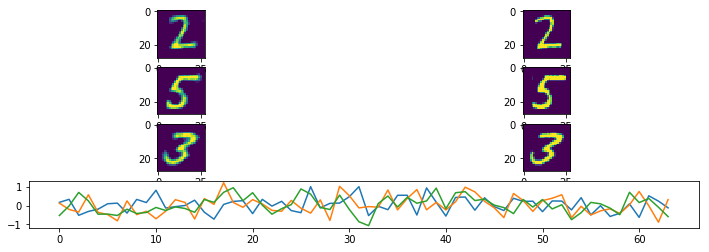

Epoch:  13 Iteration:  400 Loss:  94.84494 5.97254 1.3556077


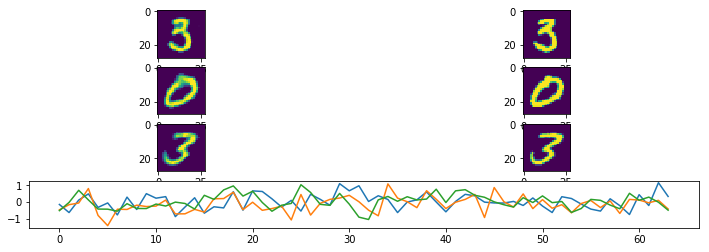

Epoch:  14 Iteration:  0 Loss:  96.91297 6.2990427 1.3391262


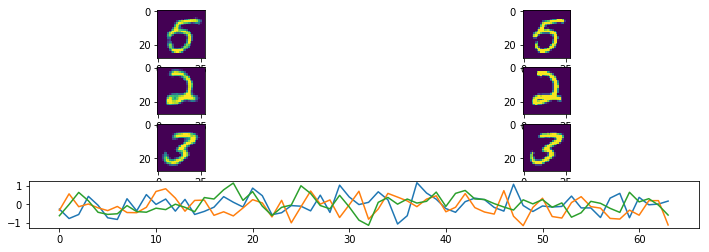

Epoch:  14 Iteration:  200 Loss:  94.44434 5.9186044 1.3362494


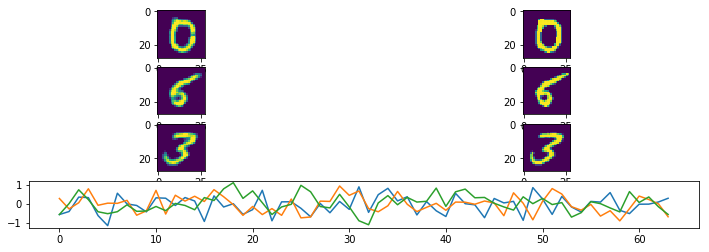

Epoch:  14 Iteration:  400 Loss:  104.75637 7.2327595 1.2728716


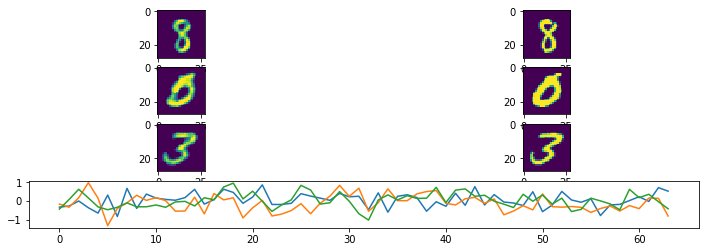

Epoch:  15 Iteration:  0 Loss:  95.74847 6.1471195 1.292619


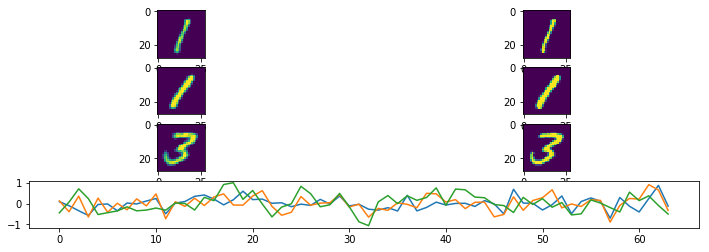

Epoch:  15 Iteration:  200 Loss:  94.20793 5.806555 1.3086609


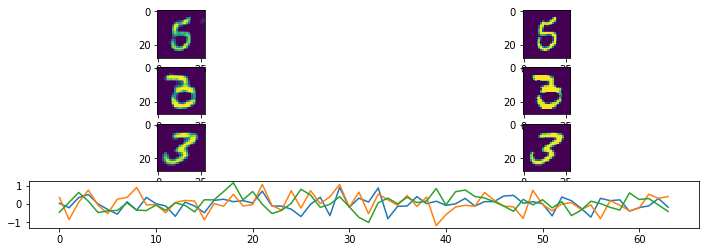

Epoch:  15 Iteration:  400 Loss:  92.57339 5.566151 1.2892691


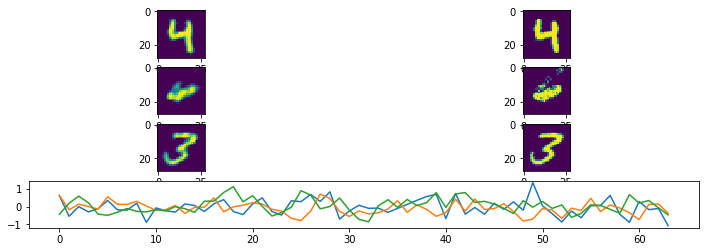

Epoch:  16 Iteration:  0 Loss:  94.66357 5.899424 1.2759835


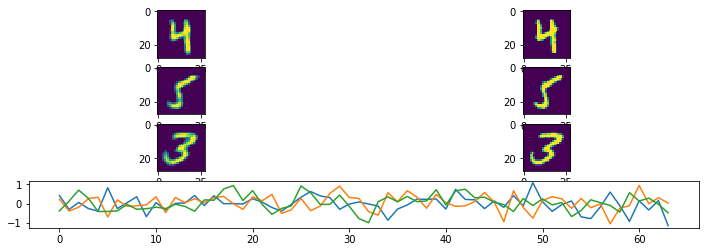

Epoch:  16 Iteration:  200 Loss:  94.835815 5.9012046 1.260063


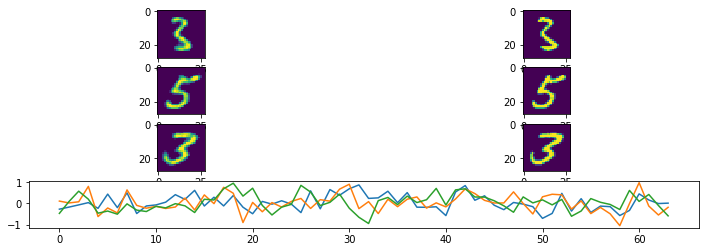

Epoch:  16 Iteration:  400 Loss:  91.555084 5.324399 1.2728313


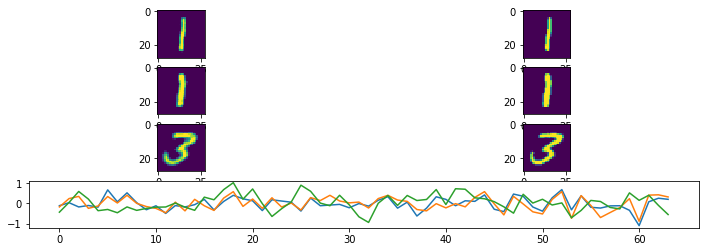

Epoch:  17 Iteration:  0 Loss:  94.14144 5.7323685 1.2519648


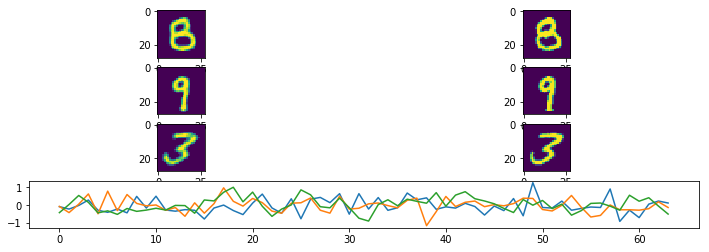

Epoch:  17 Iteration:  200 Loss:  92.00394 5.4099545 1.2582537


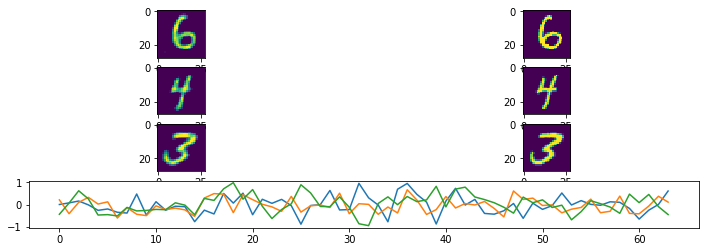

Epoch:  17 Iteration:  400 Loss:  89.66882 4.901876 1.2642573


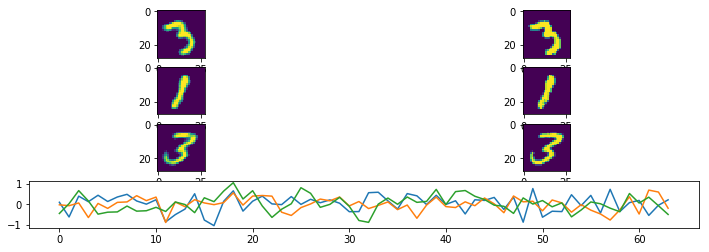

Epoch:  18 Iteration:  0 Loss:  93.19966 5.440424 1.2348158


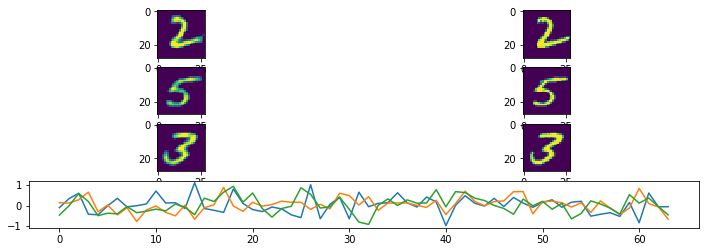

Epoch:  18 Iteration:  200 Loss:  92.09965 5.4379416 1.217446


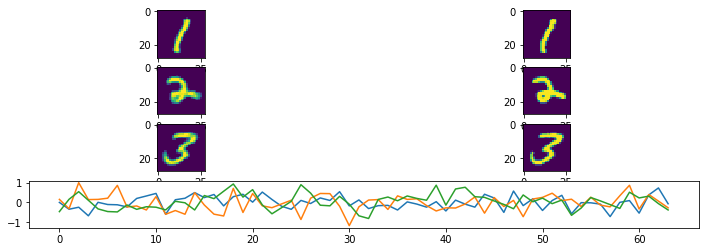

Epoch:  18 Iteration:  400 Loss:  90.25839 5.0817947 1.2126653


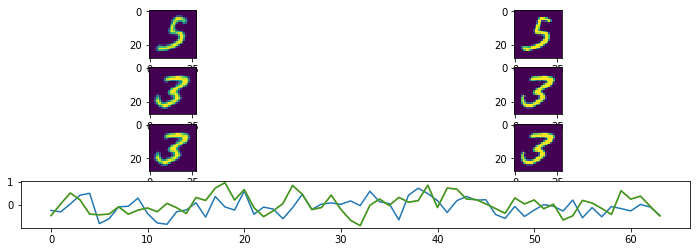

Epoch:  19 Iteration:  0 Loss:  93.13535 5.539604 1.1973519


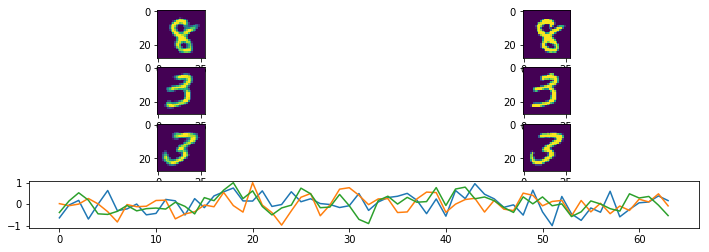

Epoch:  19 Iteration:  200 Loss:  91.316124 5.199225 1.1888635


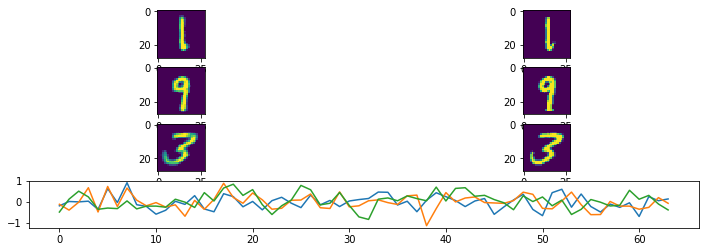

Epoch:  19 Iteration:  400 Loss:  89.63545 4.9342494 1.2080399


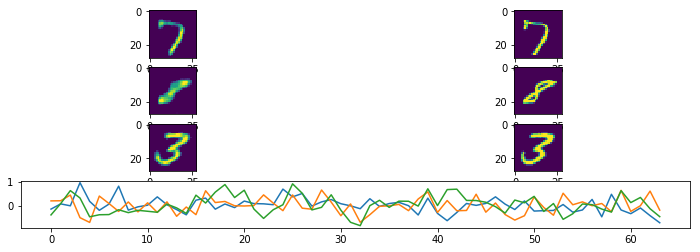

Epoch:  20 Iteration:  0 Loss:  94.397125 5.9545875 1.1447082


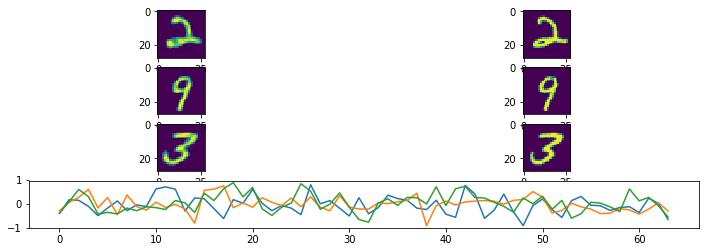

Epoch:  20 Iteration:  200 Loss:  91.31916 5.3573637 1.181543


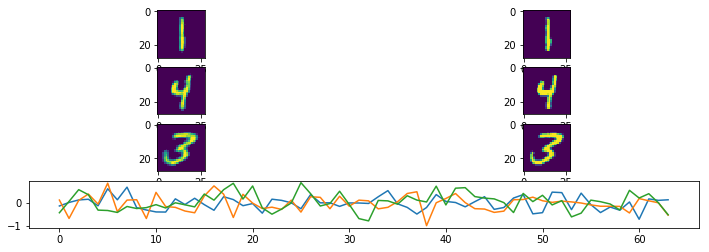

Epoch:  20 Iteration:  400 Loss:  91.97256 5.36176 1.1494625


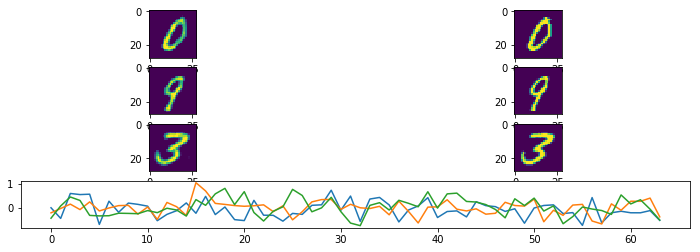

Epoch:  21 Iteration:  0 Loss:  93.2894 5.6580496 1.1342376


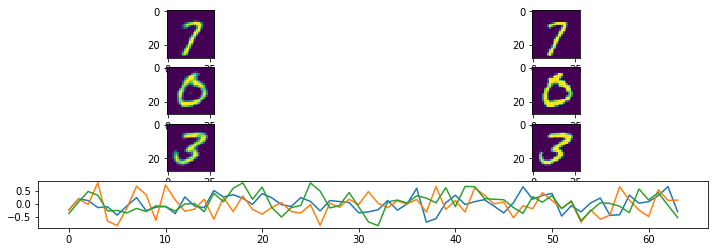

Epoch:  21 Iteration:  200 Loss:  89.59921 5.0464168 1.154302


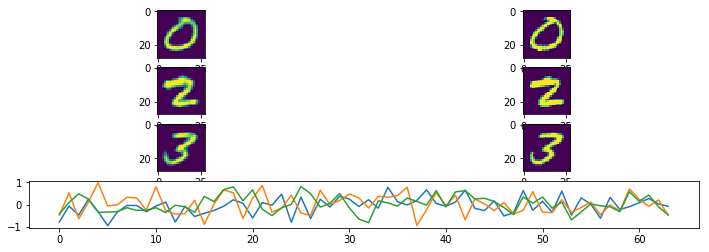

Epoch:  21 Iteration:  400 Loss:  88.24728 4.7002335 1.1674778


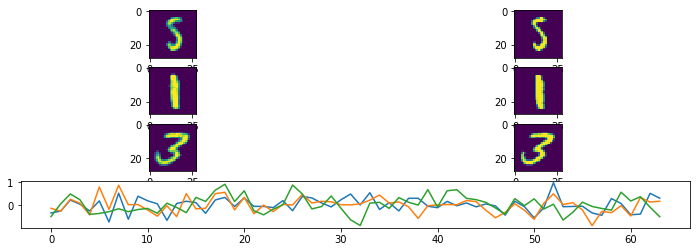

Epoch:  22 Iteration:  0 Loss:  90.06055 5.070052 1.1324654


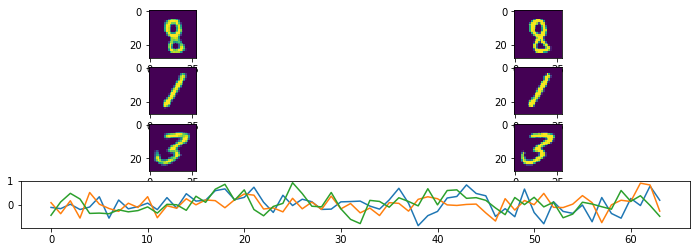

Epoch:  22 Iteration:  200 Loss:  88.543625 4.763511 1.1532608


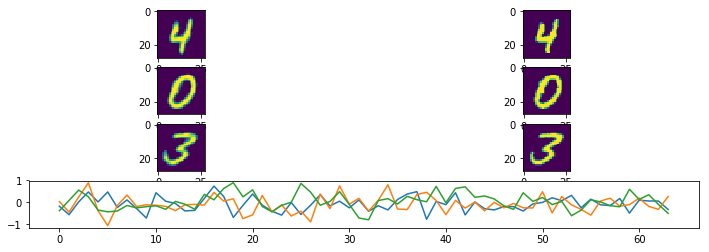

Epoch:  22 Iteration:  400 Loss:  87.548164 4.637719 1.1378491


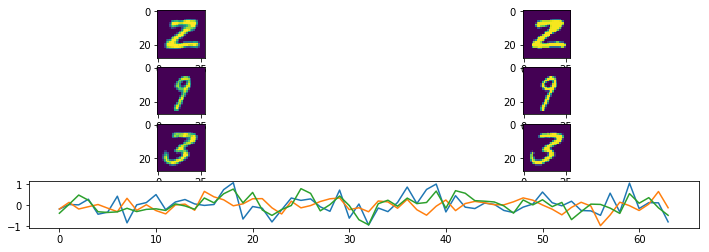

Epoch:  23 Iteration:  0 Loss:  89.50309 4.9897213 1.1178626


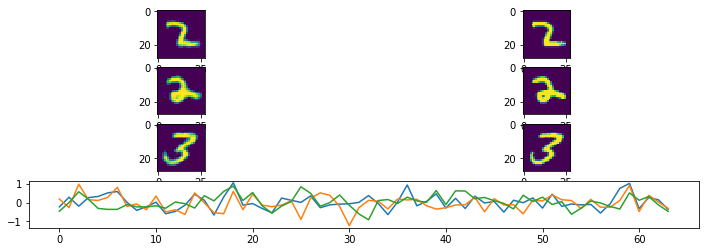

Epoch:  23 Iteration:  200 Loss:  88.408806 4.6767435 1.1265789


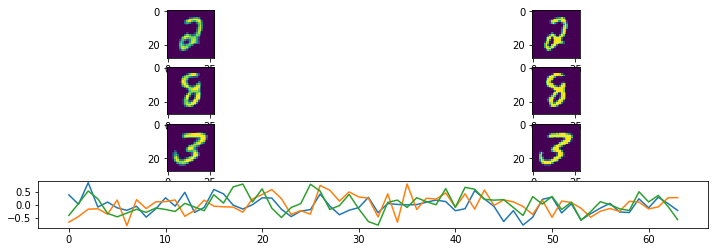

Epoch:  23 Iteration:  400 Loss:  86.0627 4.269765 1.1403722


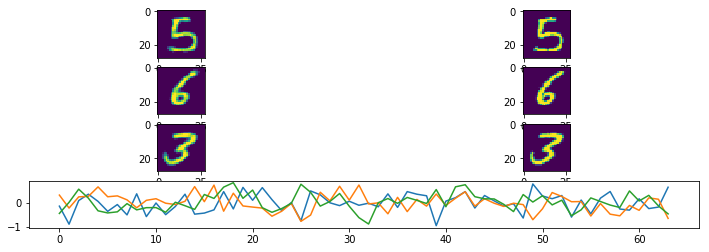

Epoch:  24 Iteration:  0 Loss:  88.04753 4.6436453 1.1133966


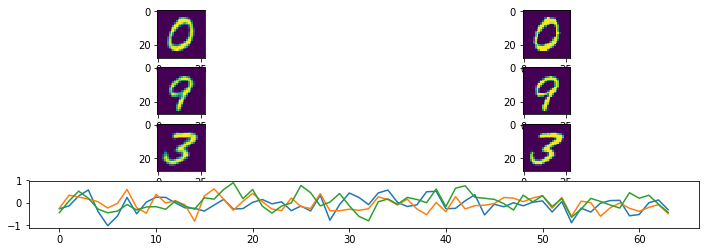

Epoch:  24 Iteration:  200 Loss:  86.71994 4.3624125 1.1164303


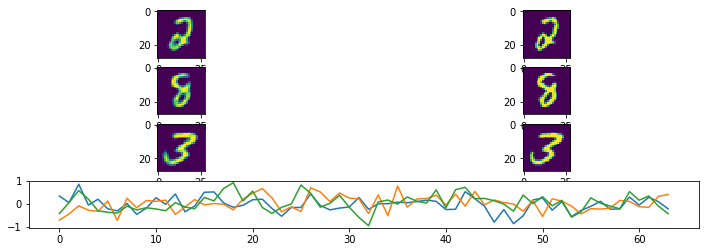

Epoch:  24 Iteration:  400 Loss:  86.94594 4.61701 1.0938714


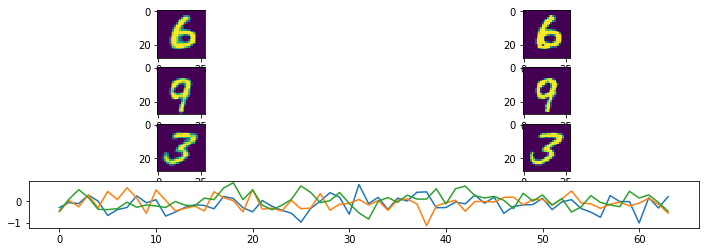

Epoch:  25 Iteration:  0 Loss:  87.39283 4.4911118 1.0968369


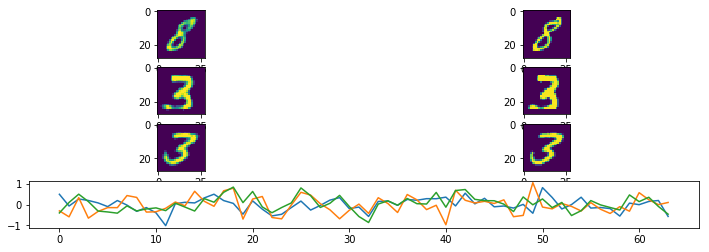

Epoch:  25 Iteration:  200 Loss:  88.36012 4.7798843 1.069213


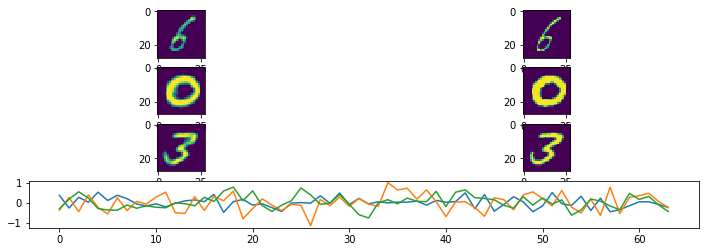

Epoch:  25 Iteration:  400 Loss:  85.5399 4.1837015 1.0940219


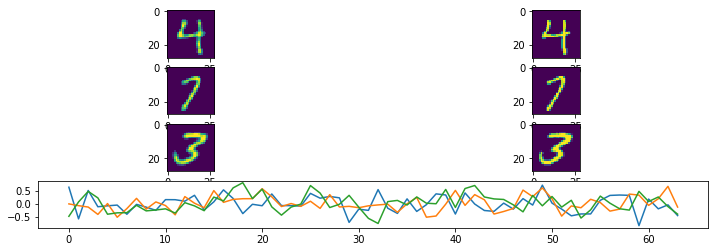

Epoch:  26 Iteration:  0 Loss:  88.25178 4.7010365 1.0557737


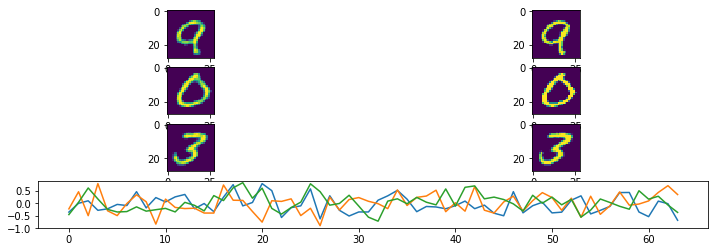

Epoch:  26 Iteration:  200 Loss:  88.03311 4.706922 1.0479444


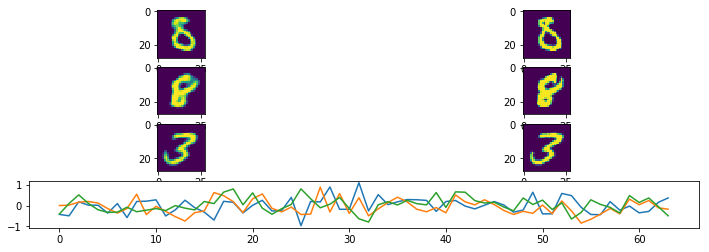

Epoch:  26 Iteration:  400 Loss:  87.57089 4.523805 1.0614624


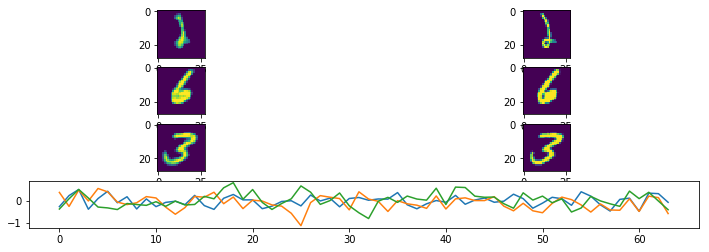

Epoch:  27 Iteration:  0 Loss:  88.519775 4.740117 1.0452641


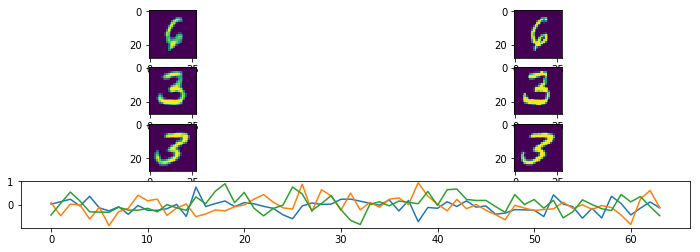

Epoch:  27 Iteration:  200 Loss:  86.14375 4.3390627 1.0489699


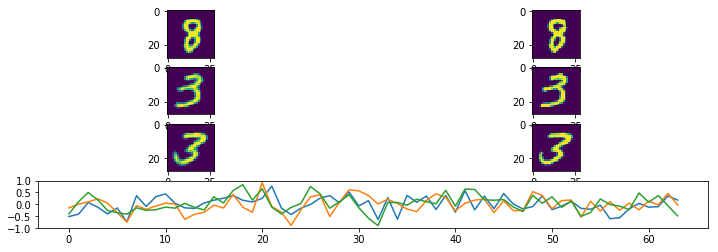

Epoch:  27 Iteration:  400 Loss:  85.550705 4.1171646 1.0525303


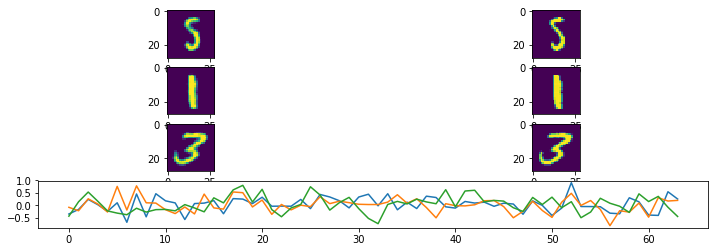

Epoch:  28 Iteration:  0 Loss:  88.89944 4.7979913 1.0172013


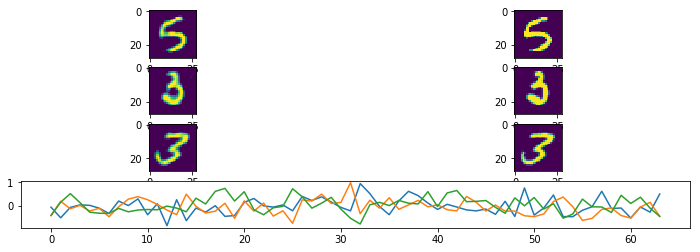

Epoch:  28 Iteration:  200 Loss:  86.06015 4.3402677 1.0330694


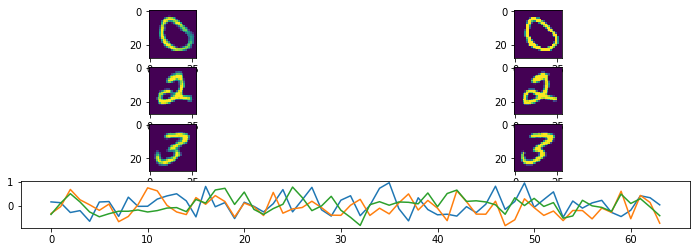

Epoch:  28 Iteration:  400 Loss:  86.46455 4.3113775 1.040752


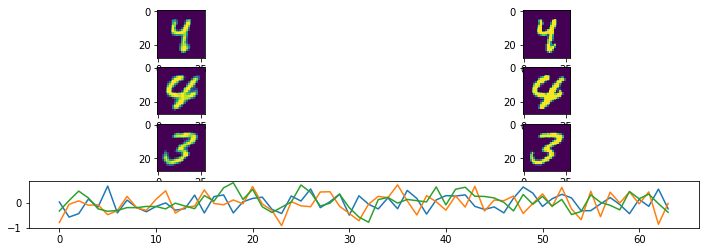

Epoch:  29 Iteration:  0 Loss:  87.179016 4.449856 1.0255122


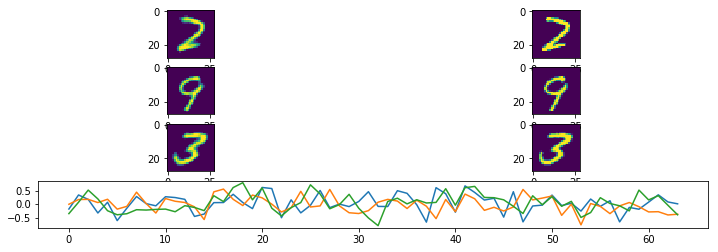

Epoch:  29 Iteration:  200 Loss:  86.600105 4.501692 1.0133162


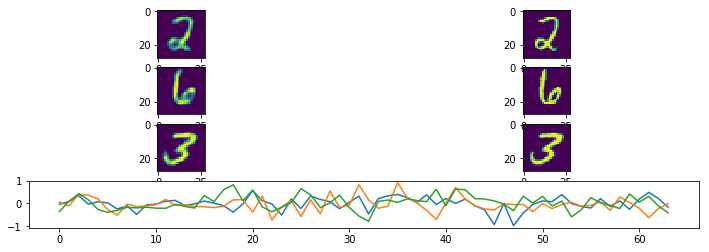

Epoch:  29 Iteration:  400 Loss:  84.593414 4.046392 1.0287781


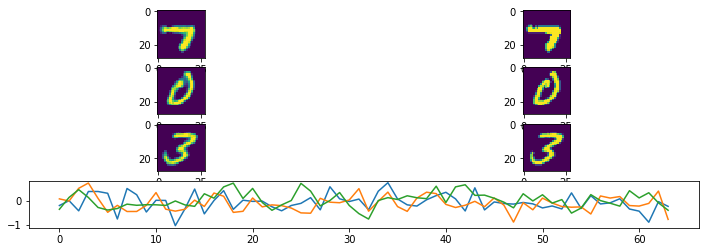

Epoch:  30 Iteration:  0 Loss:  87.07654 4.4646993 1.0067734


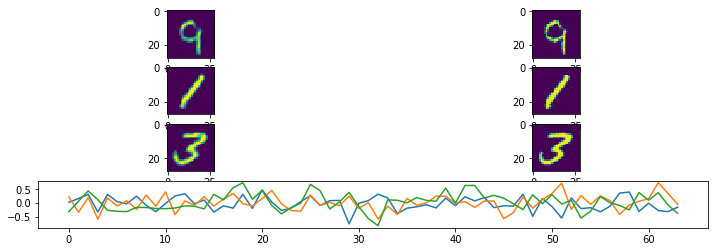

Epoch:  30 Iteration:  200 Loss:  85.63766 4.2231526 1.0146384


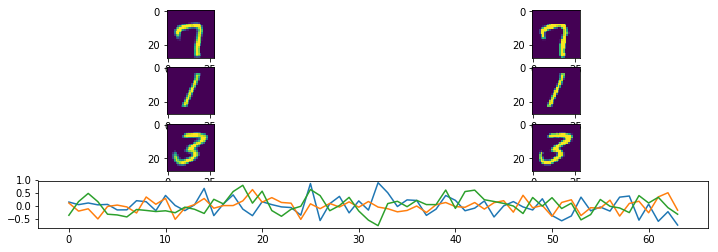

Epoch:  30 Iteration:  400 Loss:  83.906906 3.874043 1.019203


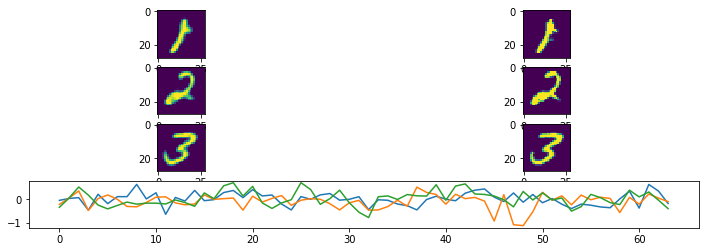

Epoch:  31 Iteration:  0 Loss:  86.125114 4.354959 0.98687583


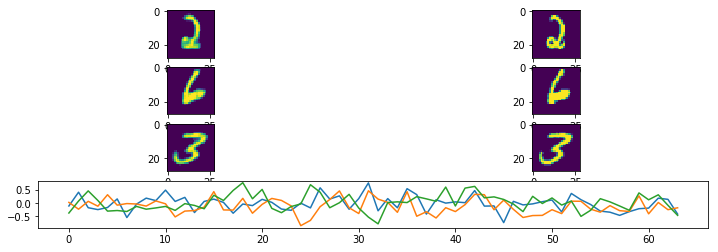

Epoch:  31 Iteration:  200 Loss:  84.69812 4.068697 0.9916802


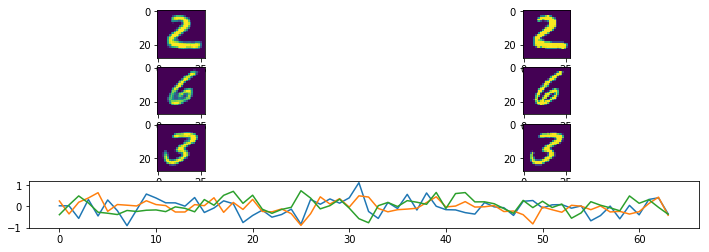

Epoch:  31 Iteration:  400 Loss:  83.97532 3.8973145 1.0034335


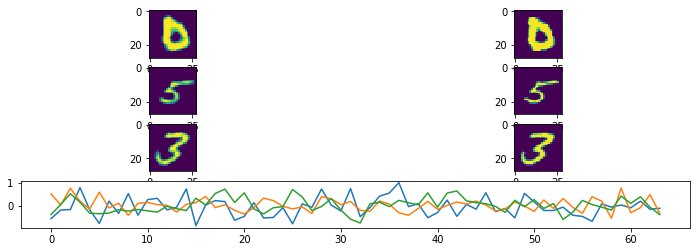

Epoch:  32 Iteration:  0 Loss:  86.35713 4.2923565 0.98724574


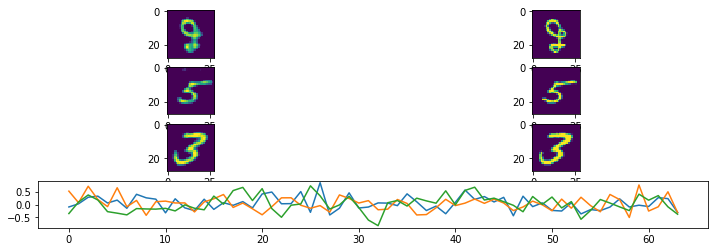

Epoch:  32 Iteration:  200 Loss:  86.260544 4.3367004 0.9825302


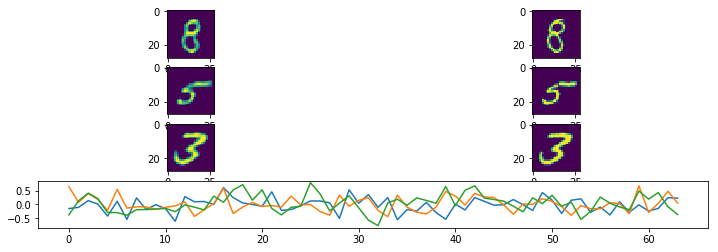

Epoch:  32 Iteration:  400 Loss:  84.27927 4.064247 0.9885881


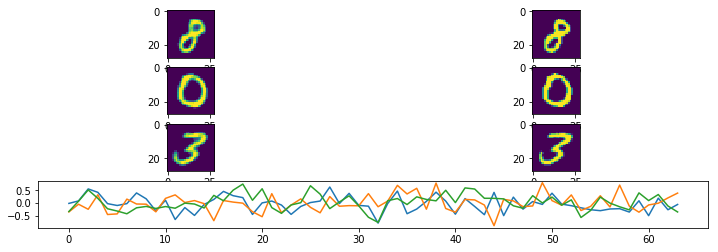

Epoch:  33 Iteration:  0 Loss:  84.84784 4.064411 0.9760927


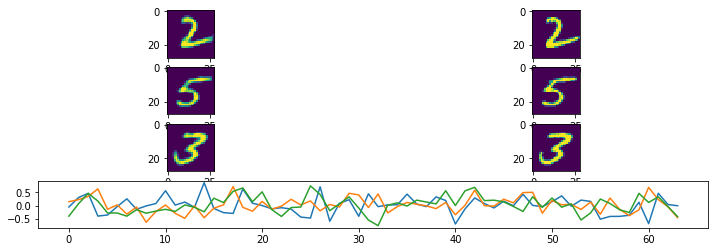

Epoch:  33 Iteration:  200 Loss:  84.26135 4.0690346 0.9678933


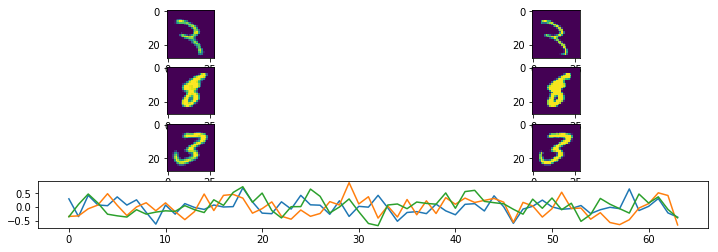

Epoch:  33 Iteration:  400 Loss:  88.02363 4.809083 0.93586785


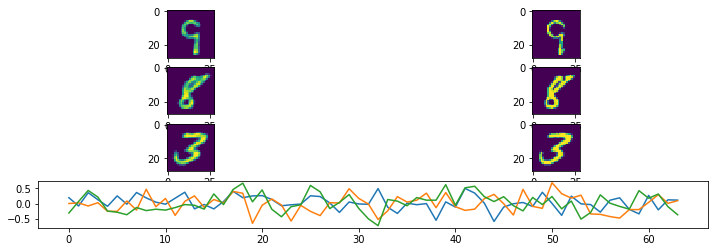

Epoch:  34 Iteration:  0 Loss:  84.76295 3.9979947 0.96108574


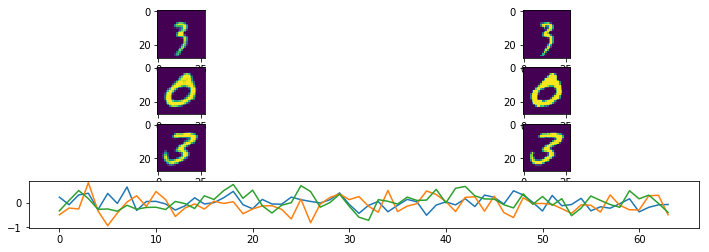

Epoch:  34 Iteration:  200 Loss:  83.74808 3.8866994 0.96211183


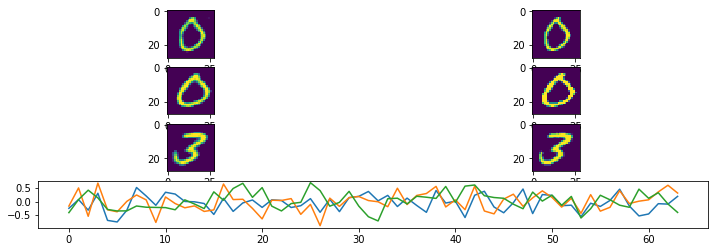

Epoch:  34 Iteration:  400 Loss:  93.07839 5.2157865 0.9087479


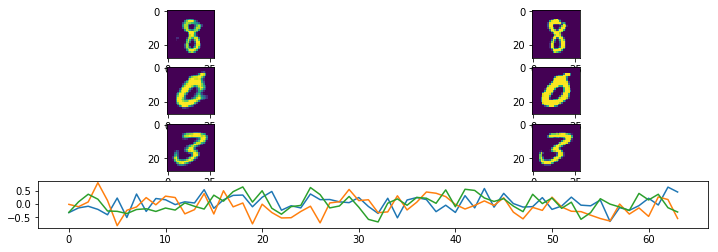

Epoch:  35 Iteration:  0 Loss:  86.156944 4.3200693 0.924086


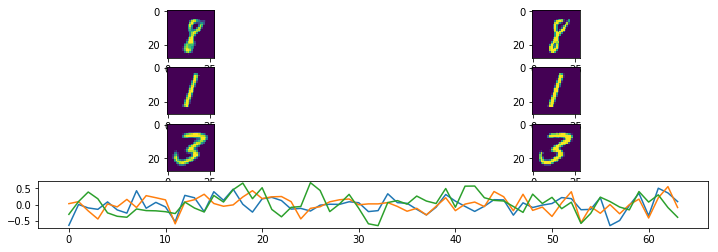

Epoch:  35 Iteration:  200 Loss:  83.01927 3.8068395 0.94251573


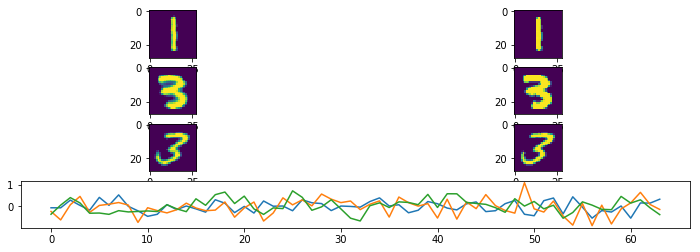

Epoch:  35 Iteration:  400 Loss:  85.49094 4.2514434 0.9282772


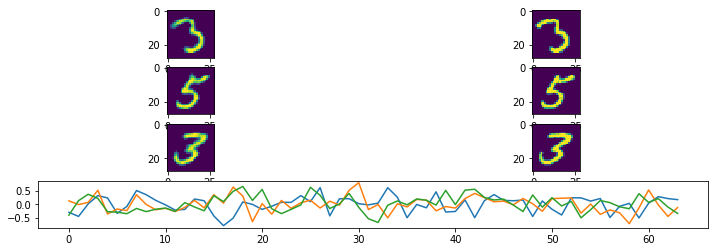

Epoch:  36 Iteration:  0 Loss:  86.12174 4.2161107 0.93029267


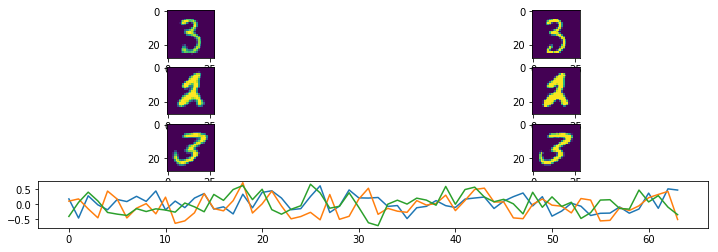

Epoch:  36 Iteration:  200 Loss:  83.26437 3.7517066 0.936621


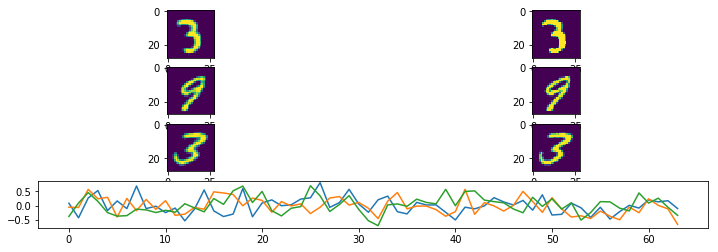

Epoch:  36 Iteration:  400 Loss:  87.51011 4.453298 0.91797245


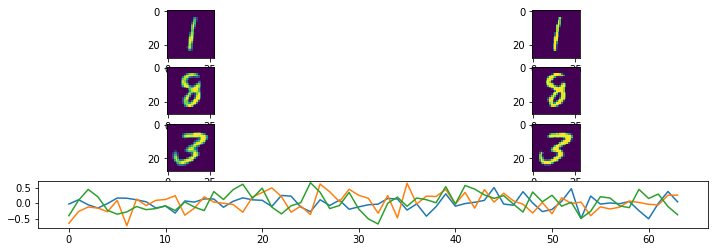

Epoch:  37 Iteration:  0 Loss:  89.50863 4.812159 0.885773


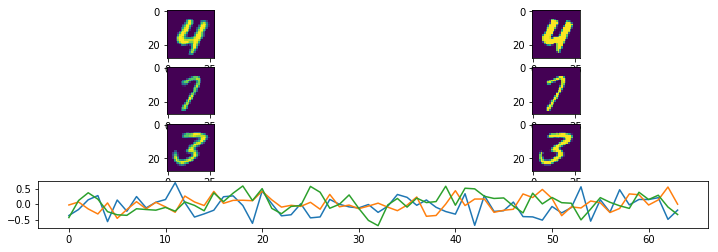

Epoch:  37 Iteration:  200 Loss:  83.42364 3.7991433 0.92560005


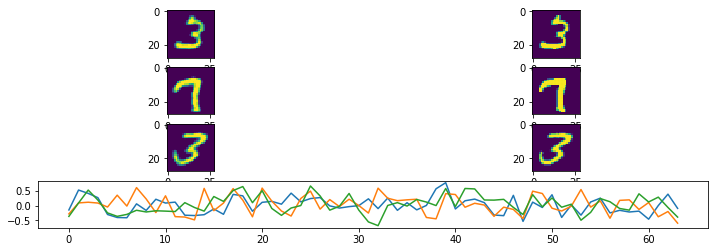

Epoch:  37 Iteration:  400 Loss:  84.456024 4.0676465 0.9195059


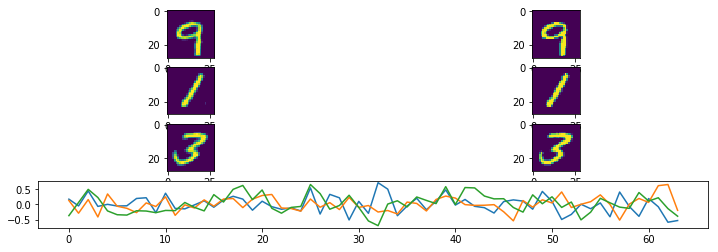

Epoch:  38 Iteration:  0 Loss:  84.02782 3.9755218 0.90938246


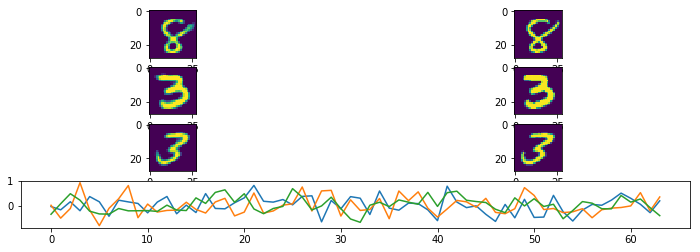

Epoch:  38 Iteration:  200 Loss:  83.916626 3.9368043 0.919896


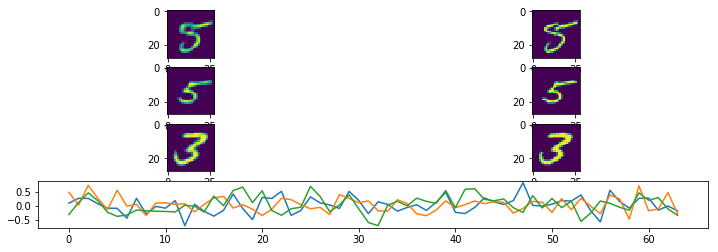

Epoch:  38 Iteration:  400 Loss:  81.97336 3.5269861 0.9293725


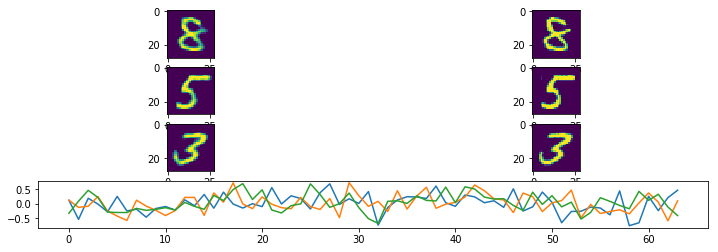

Epoch:  39 Iteration:  0 Loss:  84.73676 4.1903286 0.8955341


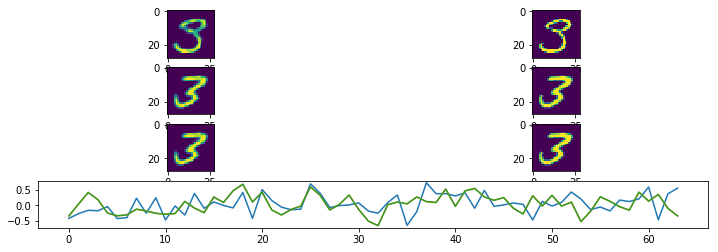

Epoch:  39 Iteration:  200 Loss:  83.622986 3.9384604 0.90599173


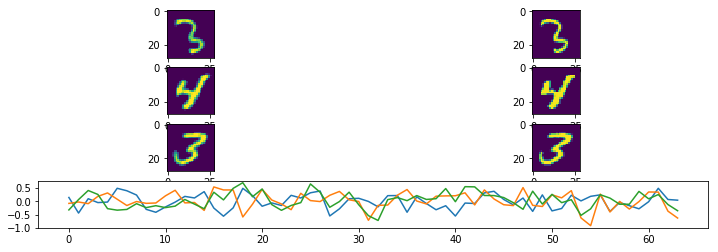

Epoch:  39 Iteration:  400 Loss:  87.99135 4.448993 0.9106702


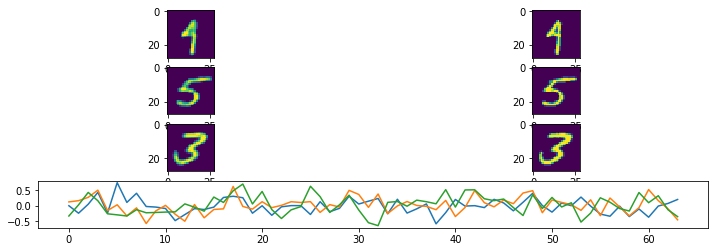

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 28
p_height = 28
p_nchannels = 1
p_channels = [0]
p_nepochs = 40
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 64 #128 + 64
p_droprate = 0.95
p_stdev = .04
p_slam = .0005
p_denoise = None
enc_sizes = [(128, 3), (256, 3)] #, (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-06-05-MNIST"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 200, cpdir)

In [5]:
x = 4
x

4